In [4]:
import numpy as np
import anndata as ad
import scanpy as sc
import palettable
import time
import seaborn as sns
import os
import pandas as pd

In [2]:
path = '/home/yzy/PUBDT/st/dsp/Hwang2022single'

In [3]:
file_list = ['BioProbeCountMatrix.txt',
            'NegNorm_TargetCountMatrix.txt',
            'Q3Norm_TargetCountMatrix.txt',
            'TargetCountMatrix.txt']

In [ ]:
# There are four versions of the count matrix. After analysis, they have about the same number of rows. We speculate that each row is a target (gene), which is represented by RTSxxx, and each column is a sample (spot), which is represented by DSPxxx.

# We want to know the spatial location of each DSP.

# A file called raw.tar is also provided. It contains hundreds of dcc files. After inspection, each line of each dcc file is an RTS. We speculate that each dcc file is the expression of all genes in a spot; the comparison with the count matrix also verified this guess.

# We downloaded another file called "AllSamples_SegmentProperties.txt" which contains the coordinates and other information for each sample.

In [8]:
raw_pd = pd.read_csv(f'{path}/BioProbeCountMatrix.txt',delimiter='\t')

/tmp/ipykernel_1104558/3817319664.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_pd = pd.read_csv(f'{path}/BioProbeCountMatrix.txt',delimiter='\t')


In [13]:
raw_pd_list = []
for file in file_list:
    raw_pd = pd.read_csv(f'{path}/{file}',delimiter='\t')
    raw_pd_list.append(raw_pd)

/tmp/ipykernel_1104558/3572250841.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_pd = pd.read_csv(f'{path}/{file}',delimiter='\t')


In [26]:
raw_pd = raw_pd_list[0].copy()

In [28]:
raw_pd = raw_pd.set_index('ProbeDisplayName')

In [31]:
raw_pd.loc['RTS0020880','DSP-1001660003872-E-B01']

5

In [15]:
raw_pd_list[1].columns

Index(['TargetName', 'DSP-1001660003683-G-A02', 'DSP-1001660003683-G-A03',
       'DSP-1001660003683-G-A04', 'DSP-1001660003683-G-A05',
       'DSP-1001660003683-G-A06', 'DSP-1001660003683-G-A07',
       'DSP-1001660003683-G-A08', 'DSP-1001660003683-G-A09',
       'DSP-1001660003683-G-A10',
       ...
       'DSP-1001660004526-D-H03', 'DSP-1001660004526-D-H04',
       'DSP-1001660004526-D-H05', 'DSP-1001660004526-D-H06',
       'DSP-1001660004526-D-H07', 'DSP-1001660004526-D-H08',
       'DSP-1001660004526-D-H09', 'DSP-1001660004526-D-H10',
       'DSP-1001660004526-D-H11', 'DSP-1001660004526-D-H12'],
      dtype='object', length=571)

In [16]:
raw_pd_list[0].columns

Index(['ProbeName', 'ProbeDisplayName', 'TargetName', 'HUGOSymbol',
       'Accessions', 'GenomeBuild', 'GenomicPosition', 'GlobalOutlier',
       'GlobalOutlierReason', 'OutlierFrequency',
       ...
       'DSP-1001660004526-D-H03', 'DSP-1001660004526-D-H04',
       'DSP-1001660004526-D-H05', 'DSP-1001660004526-D-H06',
       'DSP-1001660004526-D-H07', 'DSP-1001660004526-D-H08',
       'DSP-1001660004526-D-H09', 'DSP-1001660004526-D-H10',
       'DSP-1001660004526-D-H11', 'DSP-1001660004526-D-H12'],
      dtype='object', length=582)

In [17]:
raw_pd_list[2].columns

Index(['Gene', 'DSP.1001660003683.G.A02', 'DSP.1001660003683.G.A03',
       'DSP.1001660003683.G.A04', 'DSP.1001660003683.G.A05',
       'DSP.1001660003683.G.A06', 'DSP.1001660003683.G.A07',
       'DSP.1001660003683.G.A08', 'DSP.1001660003683.G.A09',
       'DSP.1001660003683.G.A10',
       ...
       'DSP.1001660004526.D.H03', 'DSP.1001660004526.D.H04',
       'DSP.1001660004526.D.H05', 'DSP.1001660004526.D.H06',
       'DSP.1001660004526.D.H07', 'DSP.1001660004526.D.H08',
       'DSP.1001660004526.D.H09', 'DSP.1001660004526.D.H10',
       'DSP.1001660004526.D.H11', 'DSP.1001660004526.D.H12'],
      dtype='object', length=571)

In [18]:
raw_pd_list[3].columns

Index(['TargetName', 'DSP-1001660003683-G-A02', 'DSP-1001660003683-G-A03',
       'DSP-1001660003683-G-A04', 'DSP-1001660003683-G-A05',
       'DSP-1001660003683-G-A06', 'DSP-1001660003683-G-A07',
       'DSP-1001660003683-G-A08', 'DSP-1001660003683-G-A09',
       'DSP-1001660003683-G-A10',
       ...
       'DSP-1001660004526-D-H03', 'DSP-1001660004526-D-H04',
       'DSP-1001660004526-D-H05', 'DSP-1001660004526-D-H06',
       'DSP-1001660004526-D-H07', 'DSP-1001660004526-D-H08',
       'DSP-1001660004526-D-H09', 'DSP-1001660004526-D-H10',
       'DSP-1001660004526-D-H11', 'DSP-1001660004526-D-H12'],
      dtype='object', length=571)

In [10]:
col = raw_pd.columns

In [24]:
len(raw_pd_list[3])

16235

In [11]:
'DSP-1001660003872-E-B01' in col

True

In [33]:
sample_info = pd.read_csv(f'{path}/AllSamples_SegmentProperties.txt',delimiter='\t')

In [36]:
sample_info = sample_info.set_index('Sample_ID')

In [39]:
sample_info

,Batch,Patient,PatientNumber,Slide_name,Scan_name,ROI_number,X_coordinate,Y_coordinate,Segment,AOI_area,...,AlignedReads,DeduplicatedReads,SequencingSaturation,UID,NegGeoMean_01,NegGeoSD_01,GeoLOQ2.5_01,NormFactorNeg_01,NormFactorQ3,NormFactorHK
Sample_ID,,,,,,,,,,,,,,,,,,,,,
DSP-1001660003872-E-B09,2,MGH003,3,MGH003_WTA,MGH003_WTA_20210110_01_01,1,8684.700000,18636.400000,Immune,11614.770000,...,629370.0,248716.0,60.481752,DSP-1001660003872-E-B09,4.613966,1.747596,18.628465,0.432826,0.598528,0.682674
DSP-1001660003872-E-B10,2,MGH003,3,MGH003_WTA,MGH003_WTA_20210110_01_01,1,8684.700000,18636.400000,CAF,6043.580000,...,341957.0,96083.0,71.902023,DSP-1001660003872-E-B10,2.080026,1.791337,8.933299,0.195123,0.249387,0.259458
DSP-1001660003872-E-B11,2,MGH003,3,MGH003_WTA,MGH003_WTA_20210110_01_01,1,8684.700000,18636.400000,Epithelial,12739.290000,...,1051029.0,300642.0,71.395461,DSP-1001660003872-E-B11,4.385063,1.937547,22.914307,0.411354,0.748160,0.909256
DSP-1001660003872-E-B12,2,MGH003,3,MGH003_WTA,MGH003_WTA_20210110_01_01,2,6834.300000,19769.300000,Immune,1251.340000,...,92547.0,26193.0,71.697624,DSP-1001660003872-E-B12,1.131799,1.357138,2.428451,0.106172,0.099755,0.063737
DSP-1001660003872-E-C01,2,MGH003,3,MGH003_WTA,MGH003_WTA_20210110_01_01,2,6834.300000,19769.300000,CAF,4120.600000,...,269101.0,81344.0,69.771944,DSP-1001660003872-E-C01,1.679618,1.737498,6.683768,0.157561,0.199509,0.212731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2-HM3K5DMXX-GTGAGATT-ATTGCAAG,1,MGH010,10,MGH010 Slide 1 Scan 1,MGH010 Slide 1 Scan 1,9,80.516549,33.171231,Epithelial,21880.934569,...,NaN,NaN,NaN,2-HM3K5DMXX-GTGAGATT-ATTGCAAG,10.889034,1.458994,27.997738,1.021477,2.294356,3.817155
2-HM3K5DMXX-AAGCGGCG-GTCCGAGG,1,MGH010,10,MGH010 Slide 1 Scan 1,MGH010 Slide 1 Scan 1,9,80.546896,33.205312,CAF,3649.065263,...,NaN,NaN,NaN,2-HM3K5DMXX-AAGCGGCG-GTCCGAGG,2.480986,2.029508,14.557988,0.232736,0.249387,0.298515
2-HM3K5DMXX-AGTGGAAT-TATTCGGC,1,MGH010,10,MGH010 Slide 1 Scan 1,MGH010 Slide 1 Scan 1,10,80.007450,30.212419,Epithelial,13348.717371,...,NaN,NaN,NaN,2-HM3K5DMXX-AGTGGAAT-TATTCGGC,7.170974,1.544467,21.258097,0.672694,1.296810,1.800137


In [44]:
count_pd = raw_pd_list[0]

In [45]:
count_pd

,ProbeName,ProbeDisplayName,TargetName,HUGOSymbol,Accessions,GenomeBuild,GenomicPosition,GlobalOutlier,GlobalOutlierReason,OutlierFrequency,...,DSP-1001660004526-D-H03,DSP-1001660004526-D-H04,DSP-1001660004526-D-H05,DSP-1001660004526-D-H06,DSP-1001660004526-D-H07,DSP-1001660004526-D-H08,DSP-1001660004526-D-H09,DSP-1001660004526-D-H10,DSP-1001660004526-D-H11,DSP-1001660004526-D-H12
0,NaN,RTS0020877,A2M,A2M,NaN,NaN,NaN,False,NaN,NaN,...,68,47,31,20,26,87,49,25,47,42
1,NaN,RTS0020878,NAT2,NAT2,NaN,NaN,NaN,False,NaN,NaN,...,39,9,3,14,2,10,13,1,3,34
2,NaN,RTS0020879,ACADM,ACADM,NaN,NaN,NaN,False,NaN,NaN,...,89,12,10,14,6,15,30,5,2,65
3,NaN,RTS0020880,ACADS,ACADS,NaN,NaN,NaN,False,NaN,NaN,...,93,13,5,32,11,11,42,3,4,84
4,NaN,RTS0020881,ACAT1,ACAT1,NaN,NaN,NaN,False,NaN,NaN,...,58,19,6,22,8,15,23,6,3,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16334,NaN,RTS0039348,NegProbe-WTX,NegProbe-WTX,NaN,NaN,NaN,False,NaN,NaN,...,44,7,4,12,1,6,23,2,2,39
16335,NaN,RTS0039349,NegProbe-WTX,NegProbe-WTX,NaN,NaN,NaN,False,NaN,NaN,...,41,12,4,16,2,7,16,2,1,29
16336,NaN,RTS0039350,NegProbe-WTX,NegProbe-WTX,NaN,NaN,NaN,False,NaN,NaN,...,50,11,3,11,1,12,19,4,1,43
16337,NaN,RTS0039351,NegProbe-WTX,NegProbe-WTX,NaN,NaN,NaN,False,NaN,NaN,...,44,12,4,12,3,9,12,2,3,48


In [46]:
spot_list = []
for col in count_pd.columns:
    if 'DSP-' in col:
        spot_list.append(col)

In [51]:
gene_list = count_pd[['TargetName']].values[:,0]

In [59]:
X = count_pd.loc[:,spot_list].values.transpose()

In [99]:
adata = ad.AnnData(X=X)
adata.obs_names = spot_list
adata.var_names = gene_list

/tmp/ipykernel_1104558/255935160.py:1: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X=X)


In [100]:
sample_info = sample_info.loc[spot_list]

In [101]:
obs_list = ['Batch','Patient','PatientNumber','X_coordinate','Y_coordinate',
           'Segment','AOI_area','ROI_mask_area']

In [102]:
for col in sample_info.columns:
    if col not in obs_list:
        continue
    adata.obs[col] = sample_info[[col]]
#     adata.obs[col] = adata.obs[col].astype('str')

In [103]:
adata

AnnData object with n_obs × n_vars = 570 × 16339
    obs: 'Batch', 'Patient', 'PatientNumber', 'X_coordinate', 'Y_coordinate', 'Segment', 'AOI_area', 'ROI_mask_area'

In [81]:
np.unique(adata.obs['Histology']).shape

(570,)

In [82]:
np.unique(adata.obs['Histology'])

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [107]:
adata

AnnData object with n_obs × n_vars = 570 × 16339
    obs: 'Batch', 'Patient', 'PatientNumber', 'X_coordinate', 'Y_coordinate', 'Segment', 'AOI_area', 'ROI_mask_area'
    uns: 'Patient_colors'
    obsm: 'spatial'

In [104]:
adata.obsm['spatial'] = np.vstack([adata.obs['X_coordinate'],adata.obs['Y_coordinate']]).transpose()

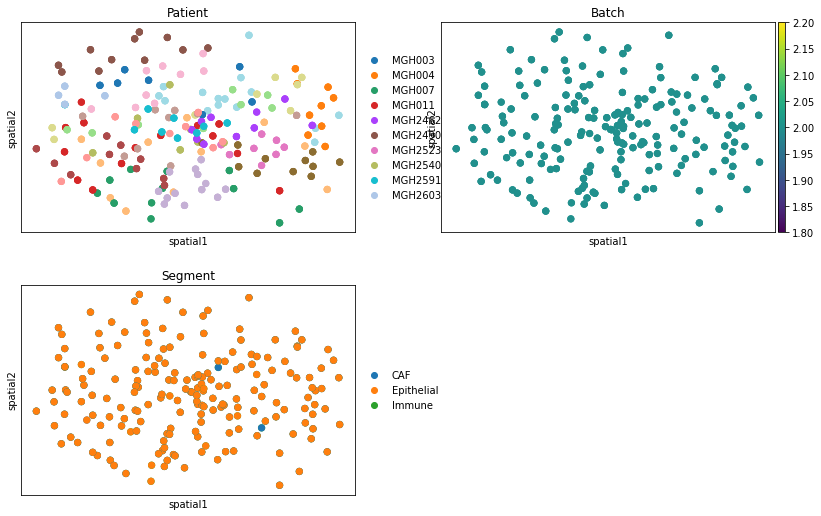

In [108]:
sc.pl.embedding(adata,basis='spatial',color=['Patient','Batch',
                                            'Segment'],ncols=2)

In [71]:
spot_list

['DSP-1001660003683-G-A02',
 'DSP-1001660003683-G-A03',
 'DSP-1001660003683-G-A04',
 'DSP-1001660003683-G-A05',
 'DSP-1001660003683-G-A06',
 'DSP-1001660003683-G-A07',
 'DSP-1001660003683-G-A08',
 'DSP-1001660003683-G-A09',
 'DSP-1001660003683-G-A10',
 'DSP-1001660003683-G-A11',
 'DSP-1001660003683-G-A12',
 'DSP-1001660003683-G-B01',
 'DSP-1001660003683-G-B02',
 'DSP-1001660003683-G-B03',
 'DSP-1001660003683-G-B04',
 'DSP-1001660003683-G-B05',
 'DSP-1001660003683-G-B06',
 'DSP-1001660003683-G-B07',
 'DSP-1001660003683-G-B08',
 'DSP-1001660003683-G-B09',
 'DSP-1001660003683-G-B10',
 'DSP-1001660003683-G-B11',
 'DSP-1001660003683-G-B12',
 'DSP-1001660003683-G-C01',
 'DSP-1001660003683-G-C02',
 'DSP-1001660003683-G-C03',
 'DSP-1001660003683-G-C04',
 'DSP-1001660003683-G-C05',
 'DSP-1001660003683-G-C06',
 'DSP-1001660003683-G-C07',
 'DSP-1001660003683-G-C08',
 'DSP-1001660003683-G-C09',
 'DSP-1001660003683-G-C10',
 'DSP-1001660003683-G-D01',
 'DSP-1001660003683-G-D02',
 'DSP-1001660003683-

In [86]:
adata

AnnData object with n_obs × n_vars = 570 × 16339
    obs: 'Batch', 'Patient', 'PatientNumber', 'Slide_name', 'Scan_name', 'ROI_number', 'X_coordinate', 'Y_coordinate', 'Segment', 'AOI_area', 'ROI_mask_area', 'Not_malignant', 'Not_collected', 'Nuclei', 'Histology', 'Infiltration', 'PrevDropped', 'TreatmentClass', 'Treatment', 'Status', 'RawReads', 'TrimmedReads', 'StitchedReads', 'AlignedReads', 'DeduplicatedReads', 'SequencingSaturation', 'UID', 'NegGeoMean_01', 'NegGeoSD_01', 'GeoLOQ2.5_01', 'NormFactorNeg_01', 'NormFactorQ3', 'NormFactorHK'
    uns: 'Patient_colors', 'Segment_colors'
    obsm: 'spatial'

In [109]:
adata.write_h5ad(f'{path}/data.h5ad')

In [84]:
path

'/home/yzy/PUBDT/st/dsp/Hwang2022single'